In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [119]:
df = pd.read_csv('data/rappiorders.csv', encoding='utf-8')
df.head(2)

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,14364873,30000009,2.478101,-72.719360,4200,2017-09-07T20:02:17Z,0
1,14370123,30000058,0.451711,37.754761,4200,2017-09-07T20:13:16Z,0


In [120]:
df.drop(['order_id'], axis=1, inplace=True)
df.head(2)

,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
0,30000009,2.478101,-72.719360,4200,2017-09-07T20:02:17Z,0
1,30000058,0.451711,37.754761,4200,2017-09-07T20:13:16Z,0


In [121]:
df['day'] = pd.DatetimeIndex(df['created_at']).day
df['month'] = pd.DatetimeIndex(df['created_at']).month
df['dayofweek'] = pd.DatetimeIndex(df['created_at']).dayofweek

df.drop(['created_at'], axis=1, inplace=True)

In [122]:
df.head(2)

,store_id,to_user_distance,to_user_elevation,total_earning,taken,day,month,dayofweek
0,30000009,2.478101,-72.719360,4200,0,7,9,3
1,30000058,0.451711,37.754761,4200,0,7,9,3


[Text(0, 0.5, 'Counts')]

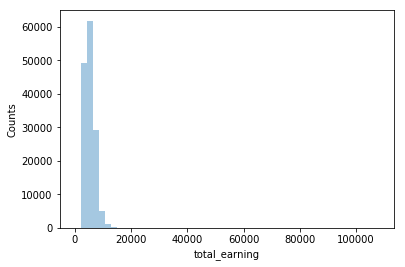

In [123]:
data = df['total_earning']
ax = sns.distplot(data, kde=False)
ax.set(ylabel='Counts')

[Text(0, 0.5, 'Counts')]

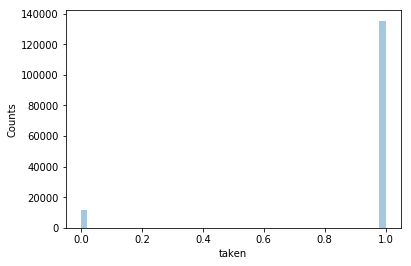

In [124]:
data = df['taken']
ax = sns.distplot(data, kde=False)
ax.set(ylabel='Counts')

[Text(0, 0.5, 'Counts')]

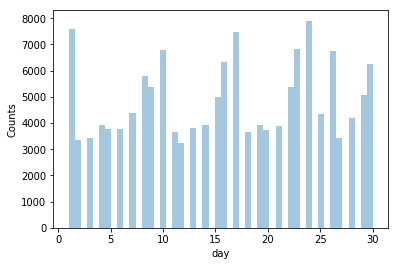

In [125]:
data = df['day']
ax = sns.distplot(data, kde=False)
ax.set(ylabel='Counts')

[Text(0, 0.5, 'Counts')]

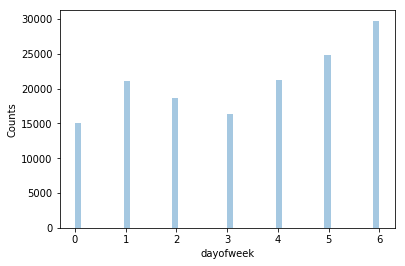

In [126]:
data = df['dayofweek']
ax = sns.distplot(data, kde=False)
ax.set(ylabel='Counts')

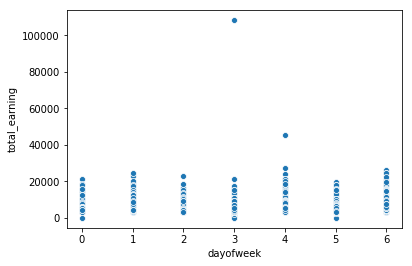

In [127]:
x = df['dayofweek']
y = df['total_earning']

sns.scatterplot(x,y)

In [128]:
model = KMeans(n_clusters=2)
model.fit(df);

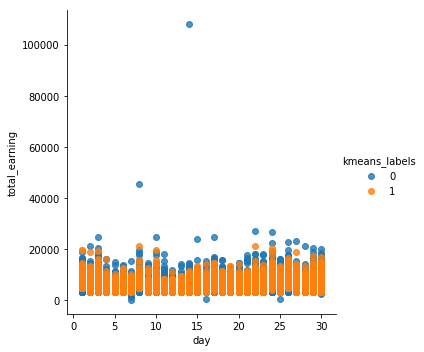

In [129]:
df['kmeans_labels'] = model.labels_
sns.lmplot(x ='day', y='total_earning', data=df, fit_reg=False, hue="kmeans_labels",legend=True)

In [130]:
k_values = range(1, 10)

k_mean_models = [KMeans(n_clusters=i) for i in k_values]

scores = [-k_mean_models[i].fit(df).score(df) for i, model in enumerate(k_mean_models)]

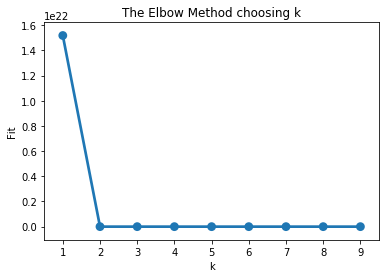

In [131]:
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

In [132]:
m = df.values
m = StandardScaler().fit_transform(m)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(m)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1'])

principalDf.head(2)

,pc1
0,3.104919
1,2.894861


In [133]:
data_pca_final = df.join(principalDf)
data_pca_final.head(2)

,store_id,to_user_distance,to_user_elevation,total_earning,taken,day,month,dayofweek,kmeans_labels,pc1
0,30000009,2.478101,-72.719360,4200,0,7,9,3,1,3.104919
1,30000058,0.451711,37.754761,4200,0,7,9,3,1,2.894861


In [134]:
data_pca_final['total_earningt_standardized'] = pd.Series(data = m[:,3], name = 'total_earningt_standardized')
data_pca_final['dayofweek_standardized'] = pd.Series(data = m[:,4], name = 'dayofweek_standardized')

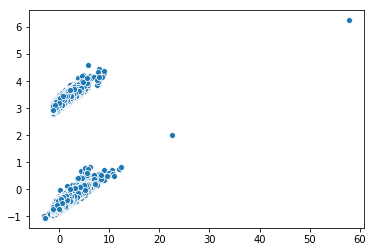

In [135]:
x = m[:,3]
y = principalComponents[:,0]

sns.scatterplot(x,y)

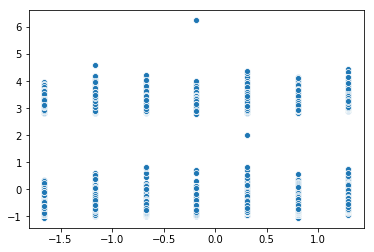

In [136]:
x = m[:,7]
y = principalComponents[:,0]

sns.scatterplot(x,y)

In [139]:
# data_pca_final = data_pca_final[['total_earningt_standardized', 'dayofweek_standardized','pc1']]
# kmeans = KMeans(n_clusters=2) 
# kmeans.fit(data_pca_final[['total_earningt_standardized', 'dayofweek_standardized']])

# data_pca_final['kmeans_labels'] = kmeans.labels_

# data_pca_final.head(2)

data_pca_final[['total_earningt_standardized', 'dayofweek_standardized','pc1']]

,total_earningt_standardized,dayofweek_standardized,pc1
0,-0.650997,-3.419529,3.104919
1,-0.650997,-3.419529,2.894861
2,-0.763370,-3.419529,-0.762671
3,-0.538625,0.292438,-0.575621
4,-1.072394,0.292438,-0.817387
5,-0.089135,0.292438,-0.729170
6,-0.650997,-3.419529,-0.679551
7,-1.212860,0.292438,-0.803338
8,-0.650997,0.292438,-0.743806
9,-1.212860,-3.419529,-0.871934


In [138]:
# kmeans_plot = sns.lmplot(x='pc1', 
#                        y='kmeans_labels', 
#                        data=data_pca_final, 
#                        fit_reg=False,        # Do not fit a regression line to the data
#                        legend=True)